<a href="https://colab.research.google.com/github/Wanghley/energy-nexus-smart-grid/blob/main/notebooks/EDA_timeseries_Pecan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install "dask[complete]" -q  # Install everything

In [ ]:
import pandas as pd

In [ ]:
import dask.dataframe as dd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
root_path = "/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data"

# Dataset Loading

In [ ]:
path = root_path+"/pecan dataset" # need to change to your location when executing

### 1-min resolution

In [ ]:
path_1min = path + "/1-min resolution"

In [ ]:
import tarfile

def unpack_tar_gz(file_path, destination_folder):
    """Unpacks a .tar.gz file to a specified destination folder.

    Args:
        file_path (str): The path to the .tar.gz file.
        destination_folder (str): The path to the destination folder where the content will be extracted.
    """
    try:
        with tarfile.open(file_path, "r:gz") as tar:
            tar.extractall(destination_folder)
        print(f"Successfully extracted '{file_path}' to '{destination_folder}'")
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
destination_folder = '/content/'

In [ ]:
unpack_tar_gz(path_1min + "/1minute_data_california.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/1-min resolution/1minute_data_california.tar.gz' to '/content/'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
unpack_tar_gz(path_1min + "/1minute_data_newyork.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/1-min resolution/1minute_data_newyork.tar.gz' to '/content/'


In [ ]:
unpack_tar_gz(path_1min + "/pr_1min.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/1-min resolution/pr_1min.tar.gz' to '/content/'


### 15-min resolution

In [ ]:
destination_folder = '/content/15-min'

In [ ]:
path_15min = path + "/15-min resolution"

In [ ]:
unpack_tar_gz(path_15min + "/15minute_data_austin.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/15-min resolution/15minute_data_austin.tar.gz' to '/content/15-min'


In [ ]:
unpack_tar_gz(path_15min + "/15minute_data_california.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/15-min resolution/15minute_data_california.tar.gz' to '/content/15-min'


In [ ]:
unpack_tar_gz(path_15min + "/pr_15min.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/15-min resolution/pr_15min.tar.gz' to '/content/15-min'


## Dataset loading

In [ ]:
path_15min = path + "/15-min resolution"
df = pd.read_csv("/content/15-min/15minute_data_california/15minute_data_california.csv")


In [ ]:
df.head()

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,3687,2014-01-01 00:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769
1,3687,2014-01-01 00:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628
2,3687,2014-01-01 00:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859
3,3687,2014-01-01 00:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985
4,3687,2014-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368


# Exploratory Data Analysis

In [ ]:
# unique number of users
df['dataid'].nunique()

23

In [ ]:
df.columns

Index(['dataid', 'local_15min', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

In [ ]:
df['local_15min'][:100].unique()

array(['2014-01-01 00:00:00-06', '2014-01-01 00:15:00-06',
       '2014-01-01 00:30:00-06', '2014-01-01 00:45:00-06',
       '2014-01-01 01:00:00-06', '2014-01-01 01:15:00-06',
       '2014-01-01 01:30:00-06', '2014-01-01 01:45:00-06',
       '2014-01-01 02:00:00-06', '2014-01-01 02:15:00-06',
       '2014-01-01 02:30:00-06', '2014-01-01 02:45:00-06',
       '2014-01-01 03:00:00-06', '2014-01-01 03:15:00-06',
       '2014-01-01 03:30:00-06', '2014-01-01 03:45:00-06',
       '2014-01-01 04:00:00-06', '2014-01-01 04:15:00-06',
       '2014-01-01 04:30:00-06', '2014-01-01 04:45:00-06',
       '2014-01-01 05:00:00-06', '2014-01-01 05:15:00-06',
       '2014-01-01 05:30:00-06', '2014-01-01 05:45:00-06',
       '2014-01-01 06:00:00-06', '2014-01-01 06:15:00-06',
       '2014-01-01 06:30:00-06', '2014-01-01 06:45:00-06',
       '2014-01-01 07:00:00-06', '2014-01-01 07:15:00-06',
       '2014-01-01 07:30:00-06', '2014-01-01 07:45:00-06',
       '2014-01-01 08:00:00-06', '2014-01-01 08:15:00-06

Converting time to a datatime format to facilitate processing

In [ ]:
df['time'] = df['local_15min'].apply(lambda x:datetime.strptime(x[:13],"%Y-%m-%d %H"))

In [ ]:
df = df.drop('local_15min',axis=1)
df.head(2)

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,time
0,3687,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769,2014-01-01
1,3687,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628,2014-01-01


In [ ]:
df.describe()

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,time
count,805524.000000,805524.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805524.000000,805524.000000,805524
mean,5806.653616,0.087100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.387734,120.611872,2015-10-07 07:48:37.316430336
min,203.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2014-01-01 00:00:00
25%,3687.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.930000,120.180000,2014-10-25 10:00:00
50%,6377.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.392000,120.623000,2015-06-21 12:00:00
75%,8574.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.867000,121.073000,2016-05-08 09:00:00
max,9836.000000,3.767000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.449000,169.745000,2018-12-31 23:00:00
std,2945.864640,0.359329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.448472,1.411108,NaN


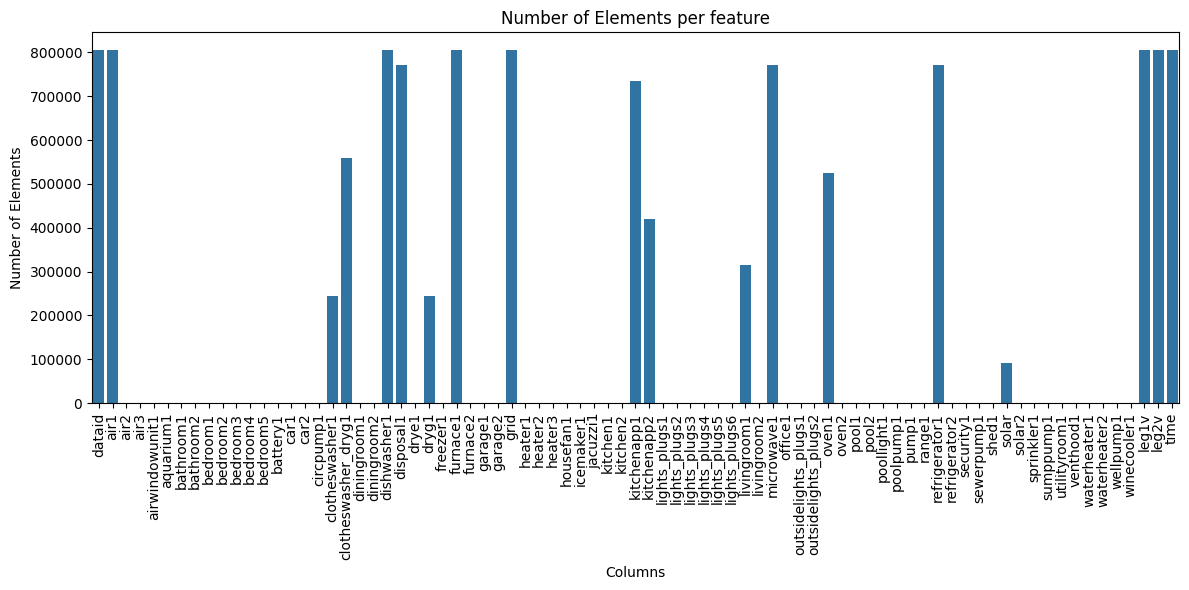

In [ ]:
element_counts = df.count()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=element_counts.index, y=element_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Elements')
plt.title('Number of Elements per feature')
plt.tight_layout()
plt.show()


### Null values removal

In [ ]:
nan_threshold = 0.5

nan_percentages = df.isnull().mean()

columns_to_drop = nan_percentages[(nan_percentages == 1) | (nan_percentages > nan_threshold)].index.tolist()

# Drop the identified columns from the Dask DataFrame
df = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
df.head()

Dropped columns: ['air2', 'air3', 'airwindowunit1', 'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2', 'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2', 'circpump1', 'clotheswasher1', 'diningroom1', 'diningroom2', 'drye1', 'dryg1', 'freezer1', 'furnace2', 'garage1', 'garage2', 'heater1', 'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1', 'kitchen2', 'lights_plugs1', 'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5', 'lights_plugs6', 'livingroom1', 'livingroom2', 'office1', 'outsidelights_plugs1', 'outsidelights_plugs2', 'oven2', 'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1', 'solar', 'solar2', 'sprinkler1', 'sumppump1', 'utilityroom1', 'venthood1', 'waterheater1', 'waterheater2', 'wellpump1', 'winecooler1']


,dataid,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,oven1,refrigerator1,leg1v,leg2v,time
0,3687,0.0,0.003,0.0,0.0,0.008,1.717,0.000,NaN,0.055,0.597,0.004,120.239,119.769,2014-01-01 00:00:00
1,3687,0.0,0.003,0.0,0.0,0.008,1.905,0.001,NaN,0.235,0.563,0.028,120.256,119.628,2014-01-01 00:00:00
2,3687,0.0,0.003,0.0,0.0,0.008,1.923,0.000,NaN,0.005,0.552,0.116,120.358,119.859,2014-01-01 00:00:00
3,3687,0.0,0.003,0.0,0.0,0.008,1.535,0.003,NaN,0.005,0.277,0.084,120.766,119.985,2014-01-01 00:00:00
4,3687,0.0,0.003,0.0,0.0,0.008,1.010,0.001,NaN,0.005,0.000,0.000,120.844,120.368,2014-01-01 01:00:00


In [ ]:
df

,dataid,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,oven1,refrigerator1,leg1v,leg2v,time
0,3687,0.000,0.003,0.0,0.0,0.008,1.717,0.000,NaN,0.055,0.597,0.004,120.239,119.769,2014-01-01 00:00:00
1,3687,0.000,0.003,0.0,0.0,0.008,1.905,0.001,NaN,0.235,0.563,0.028,120.256,119.628,2014-01-01 00:00:00
2,3687,0.000,0.003,0.0,0.0,0.008,1.923,0.000,NaN,0.005,0.552,0.116,120.358,119.859,2014-01-01 00:00:00
3,3687,0.000,0.003,0.0,0.0,0.008,1.535,0.003,NaN,0.005,0.277,0.084,120.766,119.985,2014-01-01 00:00:00
4,3687,0.000,0.003,0.0,0.0,0.008,1.010,0.001,NaN,0.005,0.000,0.000,120.844,120.368,2014-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805519,6547,0.000,0.000,0.0,0.0,0.008,0.362,0.000,NaN,0.006,0.008,0.106,121.619,120.179,2015-09-30 22:00:00
805520,6547,0.000,0.000,0.0,0.0,0.007,0.323,0.000,NaN,0.006,0.008,0.065,121.167,119.729,2015-09-30 23:00:00
805521,6547,0.000,0.000,0.0,0.0,0.008,0.303,0.000,NaN,0.006,0.008,0.045,121.198,120.253,2015-09-30 23:00:00
805522,6547,0.000,0.000,0.0,0.0,0.007,0.357,0.000,NaN,0.005,0.008,0.103,120.710,119.750,2015-09-30 23:00:00


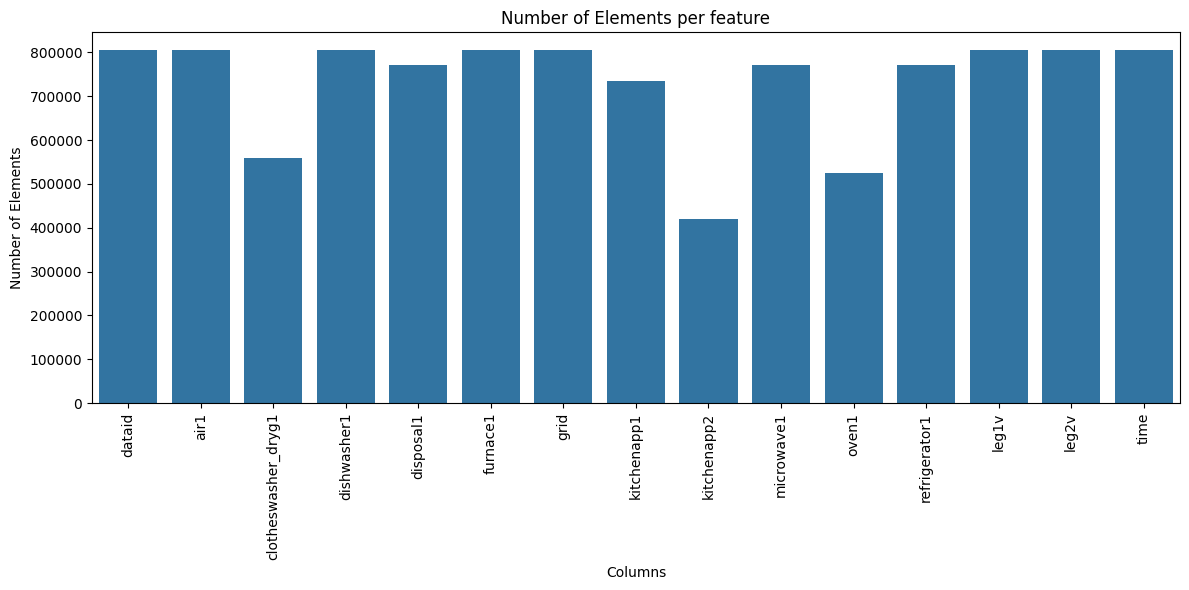

In [ ]:
element_counts = df.count()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=element_counts.index, y=element_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Elements')
plt.title('Number of Elements per feature')
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['dataid', 'air1', 'clotheswasher_dryg1', 'dishwasher1', 'disposal1',
       'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1',
       'refrigerator1', 'leg1v', 'leg2v', 'time'],
      dtype='object')

### Data dictionary

| Field                    | Description                                            | Data Type | Units     | Notes                                                     |
| ------------------------ | ------------------------------------------------------ | --------- | --------- | --------------------------------------------------------- |
| **dataid**               | Unique record identifier                               | Integer   | —         | Auto-incremented or UUID                                  |
| **time**                 | Timestamp of measurement                               | Datetime  | ISO 8601  | e.g. `2025-06-26T21:00:00-04:00`                          |
| **air1**                 | Power draw of the air-conditioning circuit             | Float     | Kilo-Watts (kW) | Measured via CT clamp on “Air compressor” channel         |
| **clotheswasher\_dryg1** | Combined washer/dryer load                             | Float     | Kilo-Watts (kW) | May include both washer and dryer if on same CT loop      |
| **dishwasher1**          | Power draw of the dishwasher                           | Float     | Kilo-Watts (kW) |                                                           |
| **disposal1**            | Power draw of the garbage disposal                     | Float     | Kilo-Watts (kW) |                                                           |
| **furnace1**             | Power draw of the furnace                              | Float     | Kilo-Watts (kW) |                                                           |
| **grid**                 | Net grid import (+) or export (–)                      | Float     | Kilo-Watts (kW) | Positive → importing from grid; negative → exporting back |
| **kitchenapp1**          | Power draw of kitchen appliance group 1 (e.g. outlets) | Float     | Kilo-Watts (kW) | Label channels according to your panel mapping            |
| **kitchenapp2**          | Power draw of kitchen appliance group 2 (e.g. outlets) | Float     | Kilo-Watts (kW) |                                                           |
| **microwave1**           | Power draw of the microwave                            | Float     | Kilo-Watts (kW) |                                                           |
| **oven1**                | Power draw of the electric oven                        | Float     | Kilo-Watts (kW) |                                                           |
| **refrigerator1**        | Power draw of the refrigerator                         | Float     | Kilo-Watts (kW) |                                                           |
| **leg1v**                | Voltage on split-phase leg 1                           | Float     | Volts (V) |                                                           |
| **leg2v**                | Voltage on split-phase leg 2                           | Float     | Volts (V) |                                                           |

In terms of leg voltages:
That setup is a split-phase (often called “residential single-phase with two hot legs”) system, not a true three-phase service.

You’ve got two hot conductors (Leg 1 and Leg 2), each ~120 V relative to neutral, but 180° out of phase with each other.

Between Leg 1 and Leg 2 you’ll measure ~240 V, which is how you power heavy loads (like your oven or dryer).

A three-phase service would have three hot legs, each 120° apart, giving you three distinct phase-to-phase voltages (and typically higher total capacity).

### Reduce dataset size with datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805524 entries, 0 to 805523
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dataid               805524 non-null  int64         
 1   air1                 805524 non-null  float64       
 2   clotheswasher_dryg1  560115 non-null  float64       
 3   dishwasher1          805524 non-null  float64       
 4   disposal1            770488 non-null  float64       
 5   furnace1             805524 non-null  float64       
 6   grid                 805524 non-null  float64       
 7   kitchenapp1          735356 non-null  float64       
 8   kitchenapp2          420013 non-null  float64       
 9   microwave1           770392 non-null  float64       
 10  oven1                525751 non-null  float64       
 11  refrigerator1        770488 non-null  float64       
 12  leg1v                805524 non-null  float64       
 13  leg2v         

In [ ]:
df['dataid'] = df['dataid'].astype('int16')
df['air1'] = df['air1'].astype('float32')
df['clotheswasher_dryg1'] = df['clotheswasher_dryg1'].astype('float32')
df['dishwasher1'] = df['dishwasher1'].astype('float32')
df['disposal1'] = df['disposal1'].astype('float32')
df['furnace1'] = df['furnace1'].astype('float32')
df['grid'] = df['grid'].astype('float32')
df['kitchenapp1'] = df['kitchenapp1'].astype('float32')
df['kitchenapp2'] = df['kitchenapp2'].astype('float32')
df['microwave1'] = df['microwave1'].astype('float32')
df['oven1'] = df['oven1'].astype('float32')
df['refrigerator1'] = df['refrigerator1'].astype('float32')
df['leg1v'] = df['leg1v'].astype('float32')
df['leg2v'] = df['leg2v'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805524 entries, 0 to 805523
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dataid               805524 non-null  int16         
 1   air1                 805524 non-null  float32       
 2   clotheswasher_dryg1  560115 non-null  float32       
 3   dishwasher1          805524 non-null  float32       
 4   disposal1            770488 non-null  float32       
 5   furnace1             805524 non-null  float32       
 6   grid                 805524 non-null  float32       
 7   kitchenapp1          735356 non-null  float32       
 8   kitchenapp2          420013 non-null  float32       
 9   microwave1           770392 non-null  float32       
 10  oven1                525751 non-null  float32       
 11  refrigerator1        770488 non-null  float32       
 12  leg1v                805524 non-null  float32       
 13  leg2v         

In [ ]:
num_data_id = df['dataid'].value_counts()
num_data_id.head()

,count
dataid,
8061,35132
9775,35132
4934,35132
5938,35132
3938,35132


<Axes: xlabel='count', ylabel='Count'>

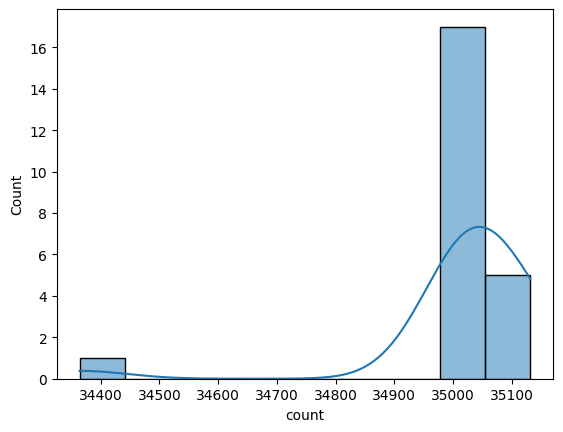

In [ ]:
sns.histplot(num_data_id,kde=True,bins=10)

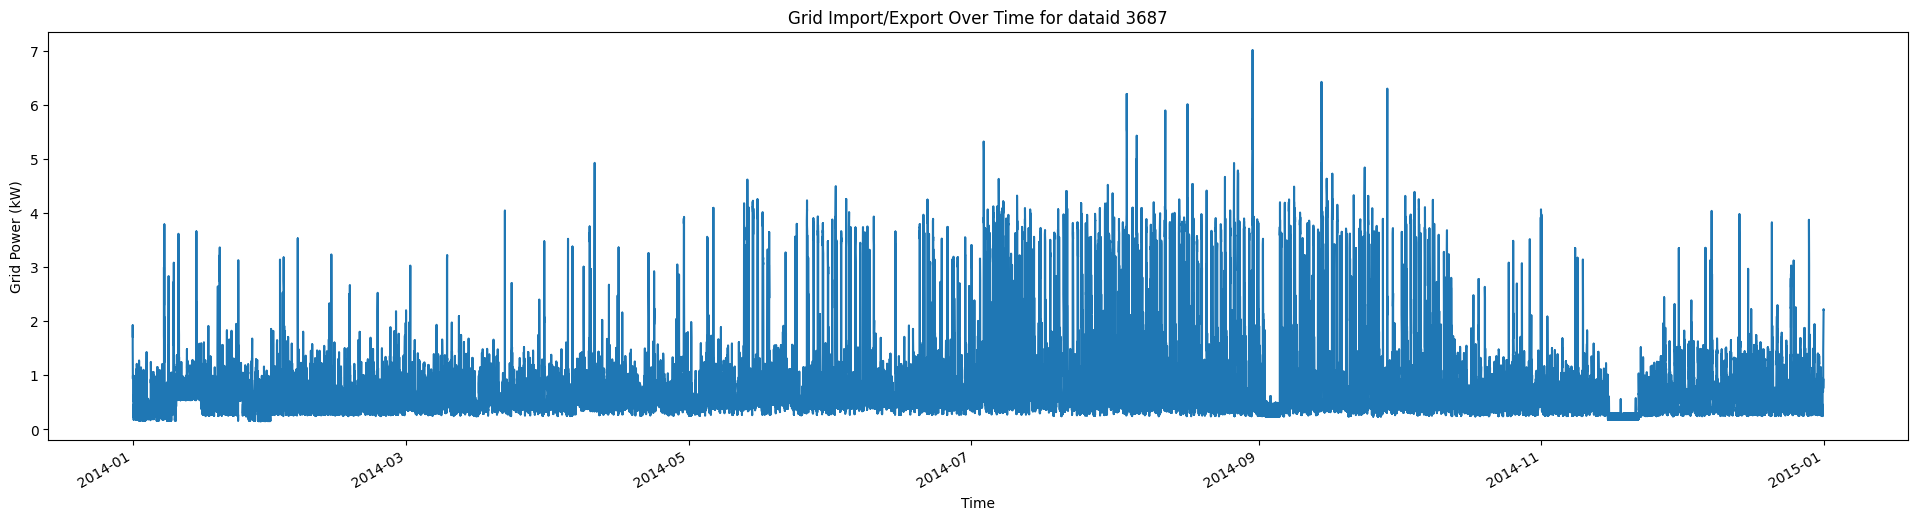

In [ ]:
# prompt: plot # 1. Time-series of net grid import/export
# plt.figure(figsize=(24, 6))
# df['grid'].plot(title='Grid Import/Export Over Time')
# plt.xlabel('Time')
# plt.ylabel('Grid Power (kW)')
# plt.show() please, use time as x-axis and use this dataid 3687

# Select data for dataid 3687
df_3687 = df[df['dataid'] == 3687].copy()

# Set 'time' column as the index for time-series plotting
df_3687.set_index('time', inplace=True)

plt.figure(figsize=(24, 6))
df_3687['grid'].plot(title='Grid Import/Export Over Time for dataid 3687')
plt.xlabel('Time')
plt.ylabel('Grid Power (kW)')
plt.show()

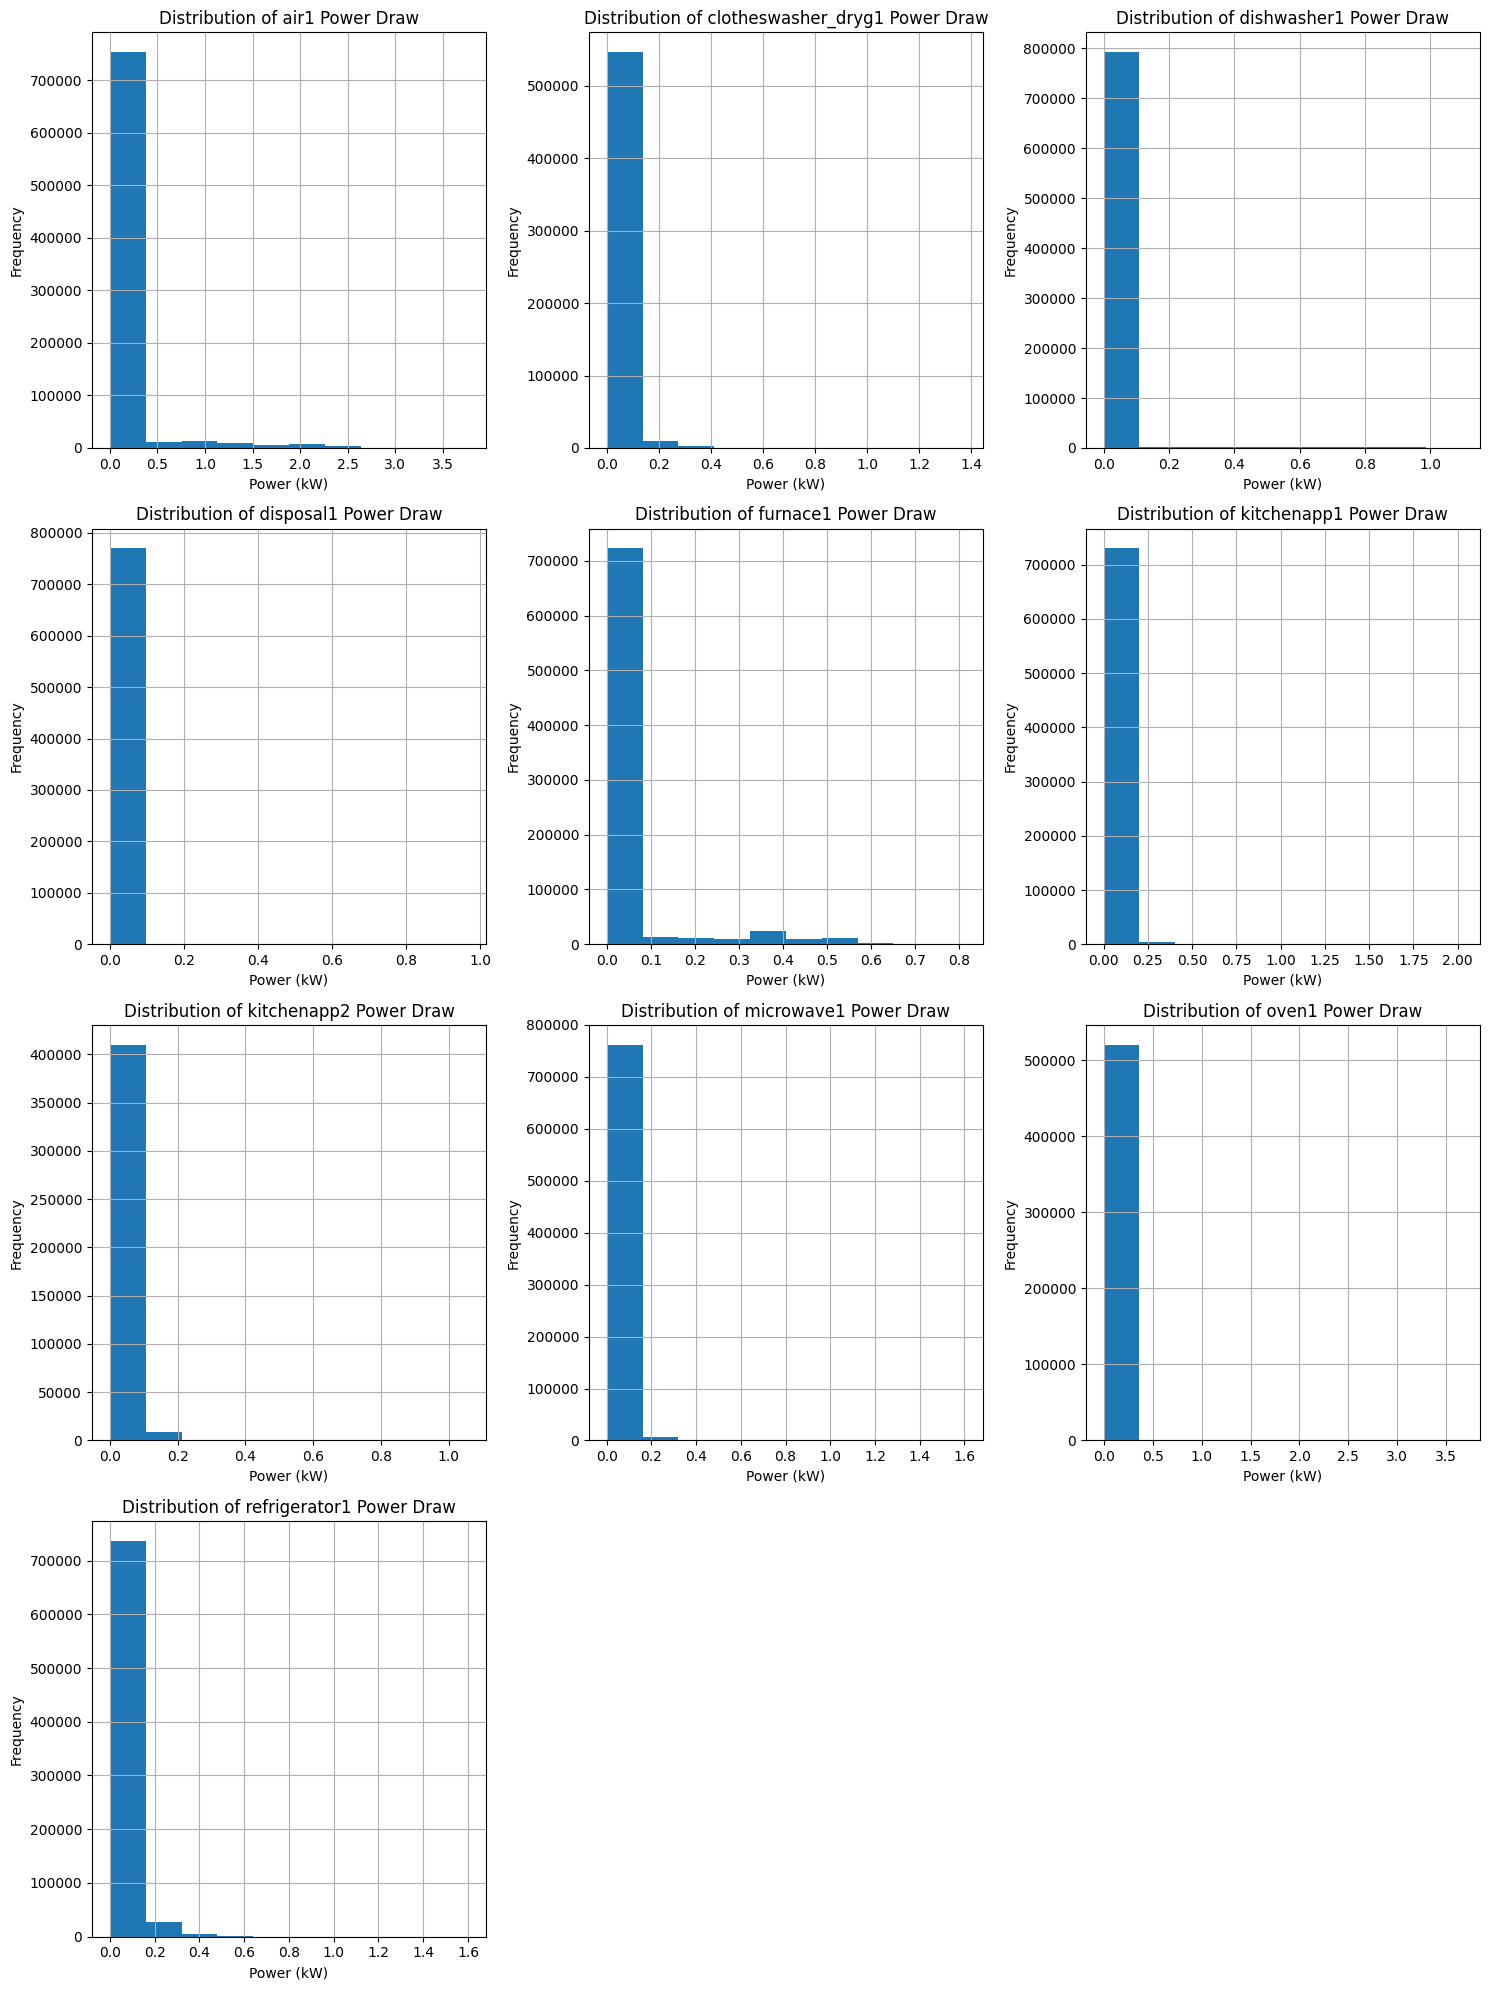

In [ ]:
appliance_cols = [
    'air1', 'clotheswasher_dryg1', 'dishwasher1', 'disposal1',
    'furnace1', 'kitchenapp1', 'kitchenapp2', 'microwave1',
    'oven1', 'refrigerator1'
]

n_cols = 3  # Number of columns for subplots
n_rows = (len(appliance_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(appliance_cols):
    df[col].hist(bins=10, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} Power Draw')
    axes[i].set_xlabel('Power (kW)')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

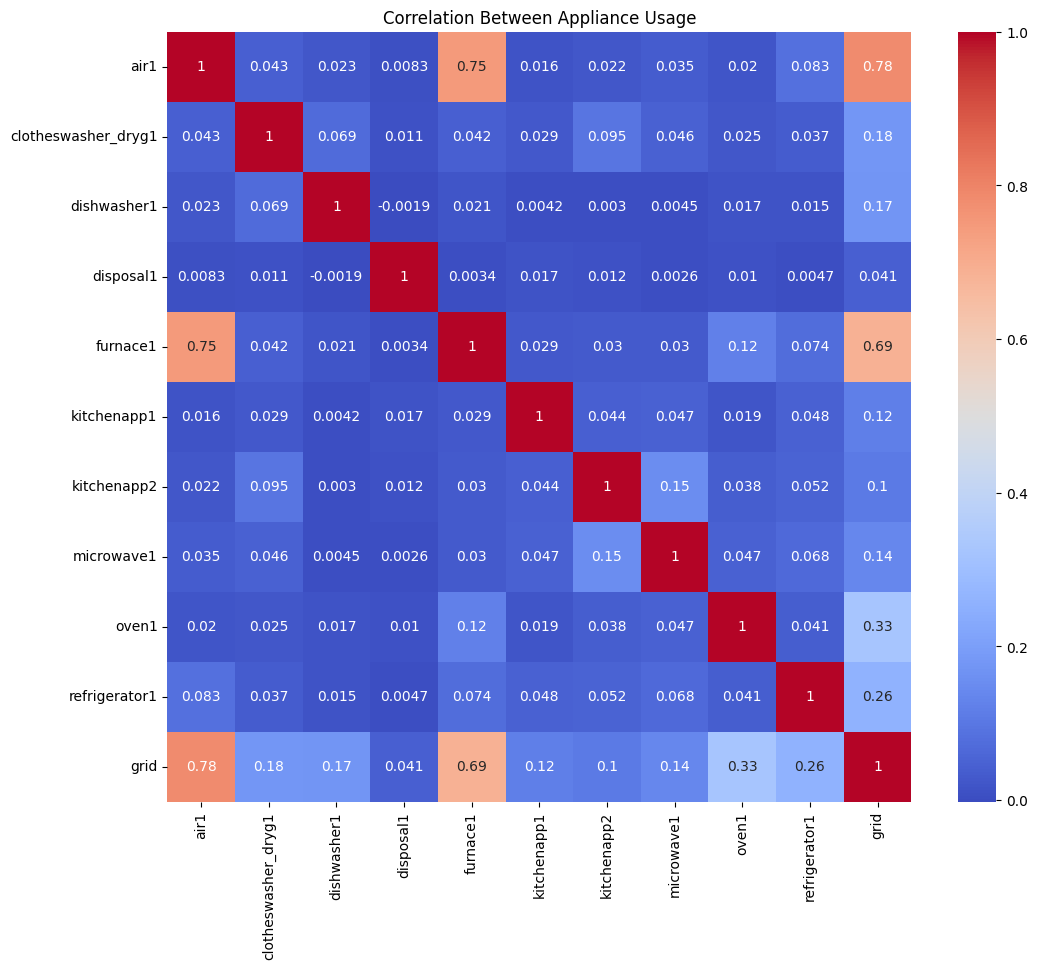

In [ ]:
appliance_cols.append('grid')
corr = df[appliance_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Appliance Usage")
plt.show()

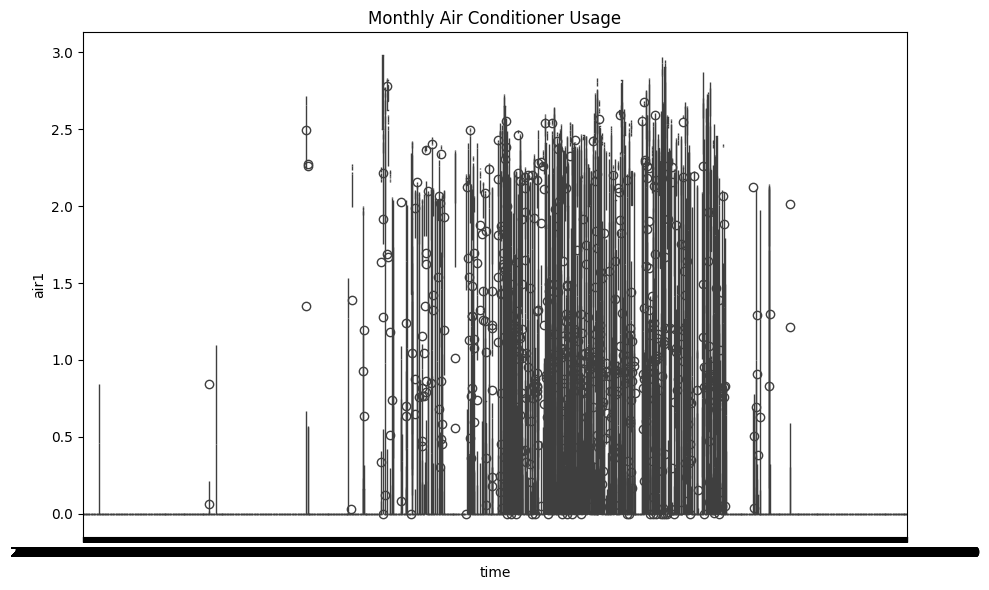

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', y='air1', data=df_3687)
plt.title('Monthly Air Conditioner Usage')
plt.tight_layout()
plt.show()

## MERGING CURRENT DATASET WITH EMISSIONS DATA

In [ ]:
# Loading of emissions data
path_emissions = root_path+"/emissions.csv"
df_emissions = pd.read_csv(path_emissions)

In [ ]:
df_emissions

,-,-.1,CO2 (lbs/MWh),CO2 (lbs/MWh).1,CO2 (lbs/MWh).2,CO2 (lbs/MWh).3,SO2 (lbs/MWh),SO2 (lbs/MWh).1,SO2 (lbs/MWh).2,SO2 (lbs/MWh).3,NOx (lbs/MWh),NOx (lbs/MWh).1,NOx (lbs/MWh).2,NOx (lbs/MWh).3
0,-,Hour,Min,Average,Max,Standard Deviation,Min,Average,Max,Standard Deviation,Min,Average,Max,Standard Deviation
1,January,Monthly Average,"1,035","1,219","1,410",70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
2,January,1,"1,185","1,292","1,395",51.3,1.62,1.82,2.11,0.13,2.13,2.43,2.74,0.16
3,January,2,"1,200","1,306","1,407",50.0,1.65,1.85,2.11,0.13,2.18,2.46,2.75,0.15
4,January,3,"1,197","1,306","1,404",53.8,1.63,1.84,2.12,0.15,2.14,2.45,2.77,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,December,21,"1,049","1,099","1,191",29.9,0.87,1.23,1.58,0.15,1.52,1.76,2.12,0.12
298,December,22,"1,062","1,117","1,215",32.7,0.90,1.26,1.67,0.16,1.55,1.80,2.13,0.13
299,December,23,"1,072","1,161","1,231",39.8,0.99,1.40,1.73,0.15,1.64,1.94,2.21,0.13
300,December,24,"1,098","1,195","1,258",37.4,1.07,1.52,1.83,0.16,1.74,2.06,2.30,0.14


In [ ]:
df_emissions.rename(columns={'-': 'Month', '-.1': 'Hour'}, inplace=True)

In [ ]:
df_emissions = df_emissions[df_emissions['Hour'] == 'Monthly Average'].reset_index(drop=True)
df_emissions

,Month,Hour,CO2 (lbs/MWh),CO2 (lbs/MWh).1,CO2 (lbs/MWh).2,CO2 (lbs/MWh).3,SO2 (lbs/MWh),SO2 (lbs/MWh).1,SO2 (lbs/MWh).2,SO2 (lbs/MWh).3,NOx (lbs/MWh),NOx (lbs/MWh).1,NOx (lbs/MWh).2,NOx (lbs/MWh).3
0,January,Monthly Average,"1,035","1,219","1,410",70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
1,February,Monthly Average,"1,031","1,151","1,326",57.7,1.01,1.42,2.15,0.19,1.63,2.00,2.53,0.18
2,March,Monthly Average,"1,007","1,171","1,351",63.2,0.87,1.33,2.10,0.21,1.56,1.96,2.50,0.19
3,April,Monthly Average,"1,046","1,239","1,591",105.8,0.93,1.53,2.36,0.29,1.59,2.17,3.11,0.30
4,May,Monthly Average,"1,065","1,237","1,514",106.8,1.02,1.58,2.26,0.30,1.60,2.19,2.95,0.32
5,June,Monthly Average,996,"1,191","1,422",94.6,0.97,1.43,2.09,0.30,1.51,2.03,2.74,0.32
6,July,Monthly Average,"1,042","1,197","1,430",85.0,0.92,1.29,1.97,0.26,1.50,1.91,2.60,0.27
7,August,Monthly Average,"1,027","1,208","1,454",94.0,0.92,1.35,2.08,0.27,1.52,1.97,2.74,0.29
8,September,Monthly Average,"1,030","1,168","1,397",87.9,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
9,October,Monthly Average,977,"1,210","1,447",100.5,0.70,1.41,2.23,0.40,1.37,2.11,2.89,0.37


In [ ]:
df_emissions.drop(columns='Hour', inplace=True)
df_emissions

,Month,CO2 (lbs/MWh),CO2 (lbs/MWh).1,CO2 (lbs/MWh).2,CO2 (lbs/MWh).3,SO2 (lbs/MWh),SO2 (lbs/MWh).1,SO2 (lbs/MWh).2,SO2 (lbs/MWh).3,NOx (lbs/MWh),NOx (lbs/MWh).1,NOx (lbs/MWh).2,NOx (lbs/MWh).3
0,January,"1,035","1,219","1,410",70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
1,February,"1,031","1,151","1,326",57.7,1.01,1.42,2.15,0.19,1.63,2.00,2.53,0.18
2,March,"1,007","1,171","1,351",63.2,0.87,1.33,2.10,0.21,1.56,1.96,2.50,0.19
3,April,"1,046","1,239","1,591",105.8,0.93,1.53,2.36,0.29,1.59,2.17,3.11,0.30
4,May,"1,065","1,237","1,514",106.8,1.02,1.58,2.26,0.30,1.60,2.19,2.95,0.32
5,June,996,"1,191","1,422",94.6,0.97,1.43,2.09,0.30,1.51,2.03,2.74,0.32
6,July,"1,042","1,197","1,430",85.0,0.92,1.29,1.97,0.26,1.50,1.91,2.60,0.27
7,August,"1,027","1,208","1,454",94.0,0.92,1.35,2.08,0.27,1.52,1.97,2.74,0.29
8,September,"1,030","1,168","1,397",87.9,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
9,October,977,"1,210","1,447",100.5,0.70,1.41,2.23,0.40,1.37,2.11,2.89,0.37


In [ ]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            12 non-null     object
 1   CO2 (lbs/MWh)    12 non-null     object
 2   CO2 (lbs/MWh).1  12 non-null     object
 3   CO2 (lbs/MWh).2  12 non-null     object
 4   CO2 (lbs/MWh).3  12 non-null     object
 5   SO2 (lbs/MWh)    12 non-null     object
 6   SO2 (lbs/MWh).1  12 non-null     object
 7   SO2 (lbs/MWh).2  12 non-null     object
 8   SO2 (lbs/MWh).3  12 non-null     object
 9   NOx (lbs/MWh)    12 non-null     object
 10  NOx (lbs/MWh).1  12 non-null     object
 11  NOx (lbs/MWh).2  12 non-null     object
 12  NOx (lbs/MWh).3  12 non-null     object
dtypes: object(13)
memory usage: 1.3+ KB


In [ ]:
def merge_emissions_with_usage(emissions_df, usage_df):
    """
    Merges emissions data with appliance usage data based on month extracted from the datetime column.

    Params:
    - emissions_df: DataFrame with columns like ['Month', 'CO2 (lbs/MWh)', ...] (string dtypes)
    - usage_df: DataFrame with a 'time' column (datetime) and power usage for appliances

    Returns:
    - merged_df: DataFrame with appliance usage and corresponding emissions data
    """

    emissions_df = emissions_df.copy()
    emissions_df['Month'] = emissions_df['Month'].str.strip().str.title()

    for col in emissions_df.columns[1:]:
        emissions_df[col] = pd.to_numeric(emissions_df[col].str.replace(',', ''), errors='coerce')

    # Extract month name from the 'time' column in usage_df
    usage_df = usage_df.copy()
    usage_df['Month'] = usage_df['time'].dt.month_name()

    # Merge on 'Month'
    merged_df = pd.merge(usage_df, emissions_df, on='Month', how='left')

    return merged_df

In [ ]:
merged_df = merge_emissions_with_usage(df_emissions, df)

merged_df

,dataid,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,...,CO2 (lbs/MWh).2,CO2 (lbs/MWh).3,SO2 (lbs/MWh),SO2 (lbs/MWh).1,SO2 (lbs/MWh).2,SO2 (lbs/MWh).3,NOx (lbs/MWh),NOx (lbs/MWh).1,NOx (lbs/MWh).2,NOx (lbs/MWh).3
0,3687,0.000,0.003,0.0,0.0,0.008,1.717,0.000,NaN,0.055,...,1410,70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
1,3687,0.000,0.003,0.0,0.0,0.008,1.905,0.001,NaN,0.235,...,1410,70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
2,3687,0.000,0.003,0.0,0.0,0.008,1.923,0.000,NaN,0.005,...,1410,70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
3,3687,0.000,0.003,0.0,0.0,0.008,1.535,0.003,NaN,0.005,...,1410,70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
4,3687,0.000,0.003,0.0,0.0,0.008,1.010,0.001,NaN,0.005,...,1410,70.6,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805519,6547,0.000,0.000,0.0,0.0,0.008,0.362,0.000,NaN,0.006,...,1397,87.9,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
805520,6547,0.000,0.000,0.0,0.0,0.007,0.323,0.000,NaN,0.006,...,1397,87.9,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
805521,6547,0.000,0.000,0.0,0.0,0.008,0.303,0.000,NaN,0.006,...,1397,87.9,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
805522,6547,0.000,0.000,0.0,0.0,0.007,0.357,0.000,NaN,0.005,...,1397,87.9,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805524 entries, 0 to 805523
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dataid               805524 non-null  int16         
 1   air1                 805524 non-null  float32       
 2   clotheswasher_dryg1  560115 non-null  float32       
 3   dishwasher1          805524 non-null  float32       
 4   disposal1            770488 non-null  float32       
 5   furnace1             805524 non-null  float32       
 6   grid                 805524 non-null  float32       
 7   kitchenapp1          735356 non-null  float32       
 8   kitchenapp2          420013 non-null  float32       
 9   microwave1           770392 non-null  float32       
 10  oven1                525751 non-null  float32       
 11  refrigerator1        770488 non-null  float32       
 12  leg1v                805524 non-null  float32       
 13  leg2v         

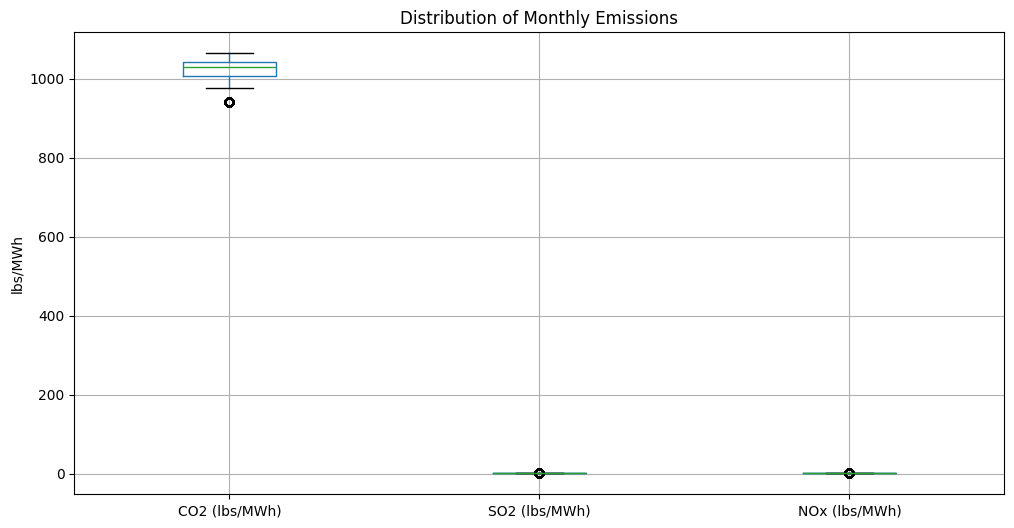

In [ ]:
# Boxplots for emissions
emission_cols = ['CO2 (lbs/MWh)', 'SO2 (lbs/MWh)', 'NOx (lbs/MWh)']
plt.figure(figsize=(12, 6))
merged_df[emission_cols].boxplot()
plt.title("Distribution of Monthly Emissions")
plt.ylabel("lbs/MWh")
plt.show()

  This shows that CO2 is a better target for regression since it has a wider variation than SO2 or NOx

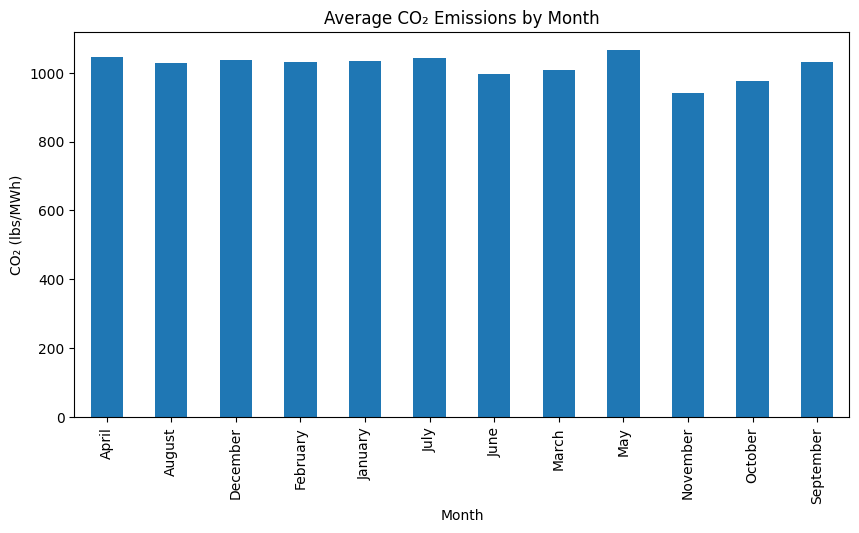

In [ ]:
# Seasonal behavior may influence pollution, so Month could be engineered as a feature.
monthly_co2 = merged_df.groupby('Month')['CO2 (lbs/MWh)'].mean().sort_index()
monthly_co2.plot(kind='bar', figsize=(10, 5), title='Average CO₂ Emissions by Month')
plt.ylabel("CO₂ (lbs/MWh)")
plt.show()

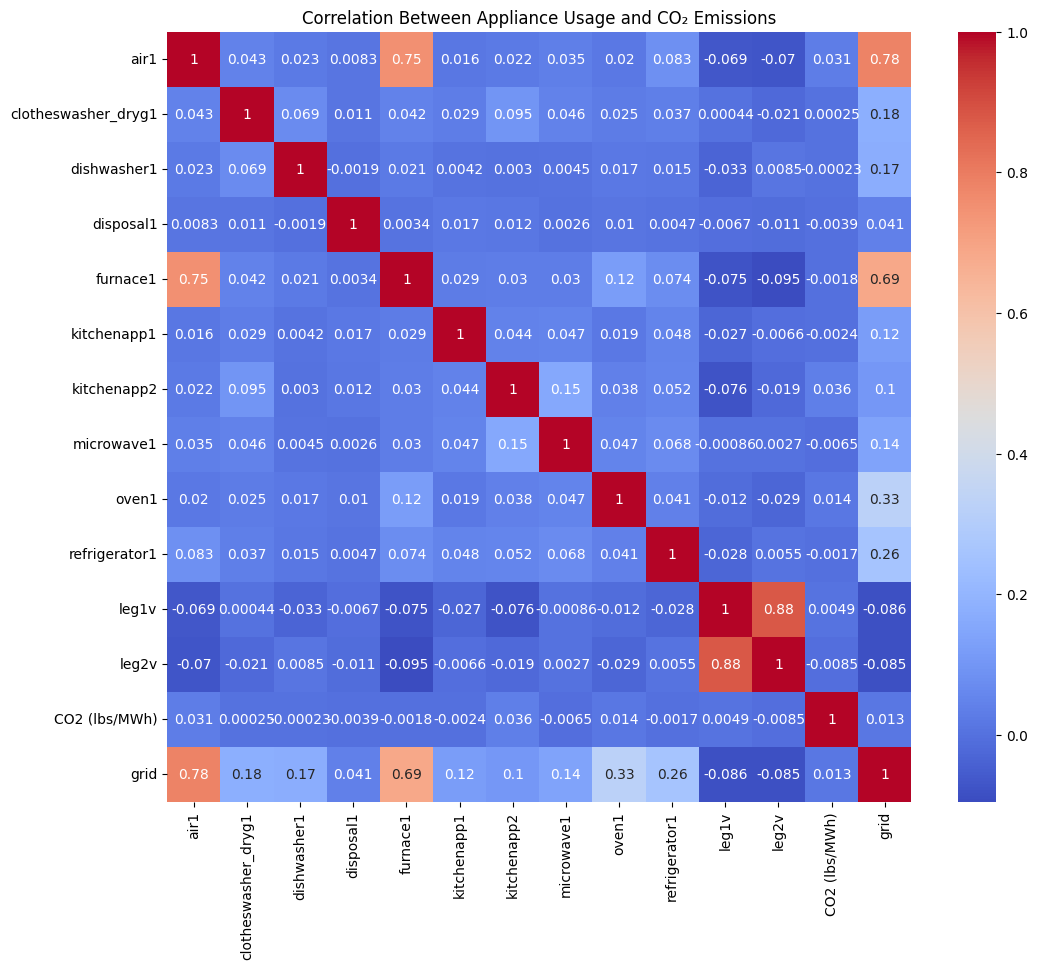

In [ ]:
# Correlation matrix
# Appliances with higher correlation to CO₂ can be key features in building a Random Forest model for recommendation
appliance_cols = [
    'air1', 'clotheswasher_dryg1', 'dishwasher1', 'disposal1', 'furnace1',
    'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1', 'refrigerator1',
    'leg1v', 'leg2v', 'CO2 (lbs/MWh)', 'grid'
]
corr = merged_df[appliance_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Appliance Usage and CO₂ Emissions")
plt.show()

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805524 entries, 0 to 805523
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dataid               805524 non-null  int16         
 1   air1                 805524 non-null  float32       
 2   clotheswasher_dryg1  560115 non-null  float32       
 3   dishwasher1          805524 non-null  float32       
 4   disposal1            770488 non-null  float32       
 5   furnace1             805524 non-null  float32       
 6   grid                 805524 non-null  float32       
 7   kitchenapp1          735356 non-null  float32       
 8   kitchenapp2          420013 non-null  float32       
 9   microwave1           770392 non-null  float32       
 10  oven1                525751 non-null  float32       
 11  refrigerator1        770488 non-null  float32       
 12  leg1v                805524 non-null  float32       
 13  leg2v         

In [ ]:
cols_to_optimize = [
    'CO2 (lbs/MWh)', 'CO2 (lbs/MWh).1', 'CO2 (lbs/MWh).2', 'CO2 (lbs/MWh).3',
    'SO2 (lbs/MWh)', 'SO2 (lbs/MWh).1', 'SO2 (lbs/MWh).2', 'SO2 (lbs/MWh).3',
    'NOx (lbs/MWh)', 'NOx (lbs/MWh).1', 'NOx (lbs/MWh).2', 'NOx (lbs/MWh).3'
]

# Downcast numerical columns to reduce memory usage
for col in cols_to_optimize:
  if col in merged_df.columns:
    if merged_df[col].dtype == 'float64':
      merged_df[col] = merged_df[col].astype('float32')
    elif merged_df[col].dtype == 'int64':
      # Using pandas.to_numeric with downcast='integer' is generally safer
      # for integer types to avoid overflow, but 'int32' or 'int16' might also work
      # depending on the value range. Let's try int32 first.
      try:
        merged_df[col] = merged_df[col].astype('int32')
      except OverflowError:
        print(f"Cannot downcast {col} to int32 due to large values. Keeping as int64.")
        pass # Keep as int64 if it overflows

# Print info after optimization
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805524 entries, 0 to 805523
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dataid               805524 non-null  int16         
 1   air1                 805524 non-null  float32       
 2   clotheswasher_dryg1  560115 non-null  float32       
 3   dishwasher1          805524 non-null  float32       
 4   disposal1            770488 non-null  float32       
 5   furnace1             805524 non-null  float32       
 6   grid                 805524 non-null  float32       
 7   kitchenapp1          735356 non-null  float32       
 8   kitchenapp2          420013 non-null  float32       
 9   microwave1           770392 non-null  float32       
 10  oven1                525751 non-null  float32       
 11  refrigerator1        770488 non-null  float32       
 12  leg1v                805524 non-null  float32       
 13  leg2v         

In [ ]:
new_columns = {
    'CO2 (lbs/MWh)': 'CO2_Min',
    'CO2 (lbs/MWh).1': 'CO2_Average',
    'CO2 (lbs/MWh).2': 'CO2_Max',
    'CO2 (lbs/MWh).3': 'CO2_Standard_Deviation',
    'SO2 (lbs/MWh)': 'SO2_Min',
    'SO2 (lbs/MWh).1': 'SO2_Average',
    'SO2 (lbs/MWh).2': 'SO2_Max',
    'SO2 (lbs/MWh).3': 'SO2_Standard_Deviation',
    'NOx (lbs/MWh)': 'NOx_Min',
    'NOx (lbs/MWh).1': 'NOx_Average',
    'NOx (lbs/MWh).2': 'NOx_Max',
    'NOx (lbs/MWh).3': 'NOx_Standard_Deviation'
}

merged_df.rename(columns=new_columns, inplace=True)
merged_df

,dataid,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,...,CO2_Max,CO2_Standard_Deviation,SO2_Min,SO2_Average,SO2_Max,SO2_Standard_Deviation,NOx_Min,NOx_Average,NOx_Max,NOx_Standard_Deviation
0,3687,0.000,0.003,0.0,0.0,0.008,1.717,0.000,NaN,0.055,...,1410,70.599998,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
1,3687,0.000,0.003,0.0,0.0,0.008,1.905,0.001,NaN,0.235,...,1410,70.599998,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
2,3687,0.000,0.003,0.0,0.0,0.008,1.923,0.000,NaN,0.005,...,1410,70.599998,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
3,3687,0.000,0.003,0.0,0.0,0.008,1.535,0.003,NaN,0.005,...,1410,70.599998,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
4,3687,0.000,0.003,0.0,0.0,0.008,1.010,0.001,NaN,0.005,...,1410,70.599998,1.15,1.61,2.12,0.19,1.65,2.21,2.77,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805519,6547,0.000,0.000,0.0,0.0,0.008,0.362,0.000,NaN,0.006,...,1397,87.900002,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
805520,6547,0.000,0.000,0.0,0.0,0.007,0.323,0.000,NaN,0.006,...,1397,87.900002,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
805521,6547,0.000,0.000,0.0,0.0,0.008,0.303,0.000,NaN,0.006,...,1397,87.900002,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30
805522,6547,0.000,0.000,0.0,0.0,0.007,0.357,0.000,NaN,0.005,...,1397,87.900002,0.90,1.36,2.14,0.29,1.46,1.95,2.76,0.30


In [ ]:
merged_df.to_csv('/content/merged_df_electricity_carbon_california.csv')

### EDA part 2 with carbon emission data

<Axes: >

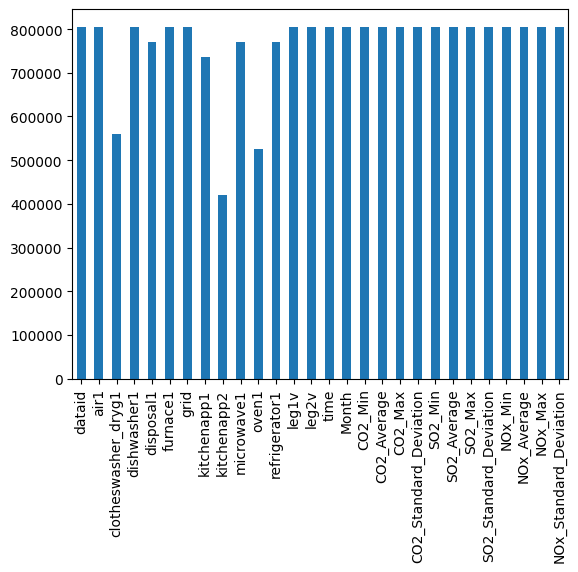

In [ ]:
merged_df.count().plot(kind='bar')

In [ ]:
merged_df.columns

Index(['dataid', 'air1', 'clotheswasher_dryg1', 'dishwasher1', 'disposal1',
       'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2', 'microwave1', 'oven1',
       'refrigerator1', 'leg1v', 'leg2v', 'time', 'Month', 'CO2_Min',
       'CO2_Average', 'CO2_Max', 'CO2_Standard_Deviation', 'SO2_Min',
       'SO2_Average', 'SO2_Max', 'SO2_Standard_Deviation', 'NOx_Min',
       'NOx_Average', 'NOx_Max', 'NOx_Standard_Deviation'],
      dtype='object')

#### Correlation Heatplot

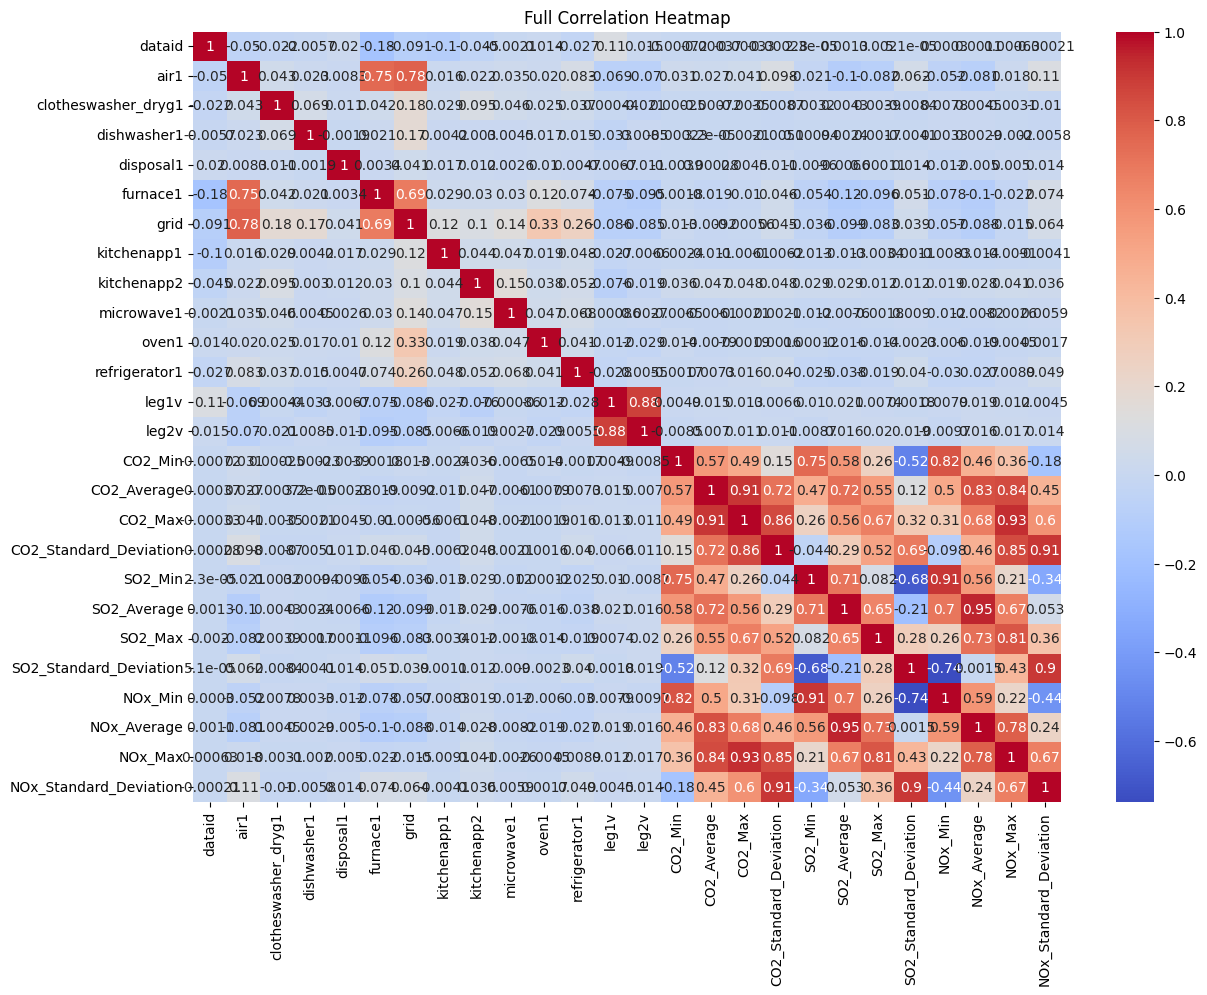

In [ ]:
plt.figure(figsize=(14, 10))
# calculate corr without time, and Month columns
corr = merged_df.drop(columns=['time', 'Month']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Full Correlation Heatmap")
plt.show()

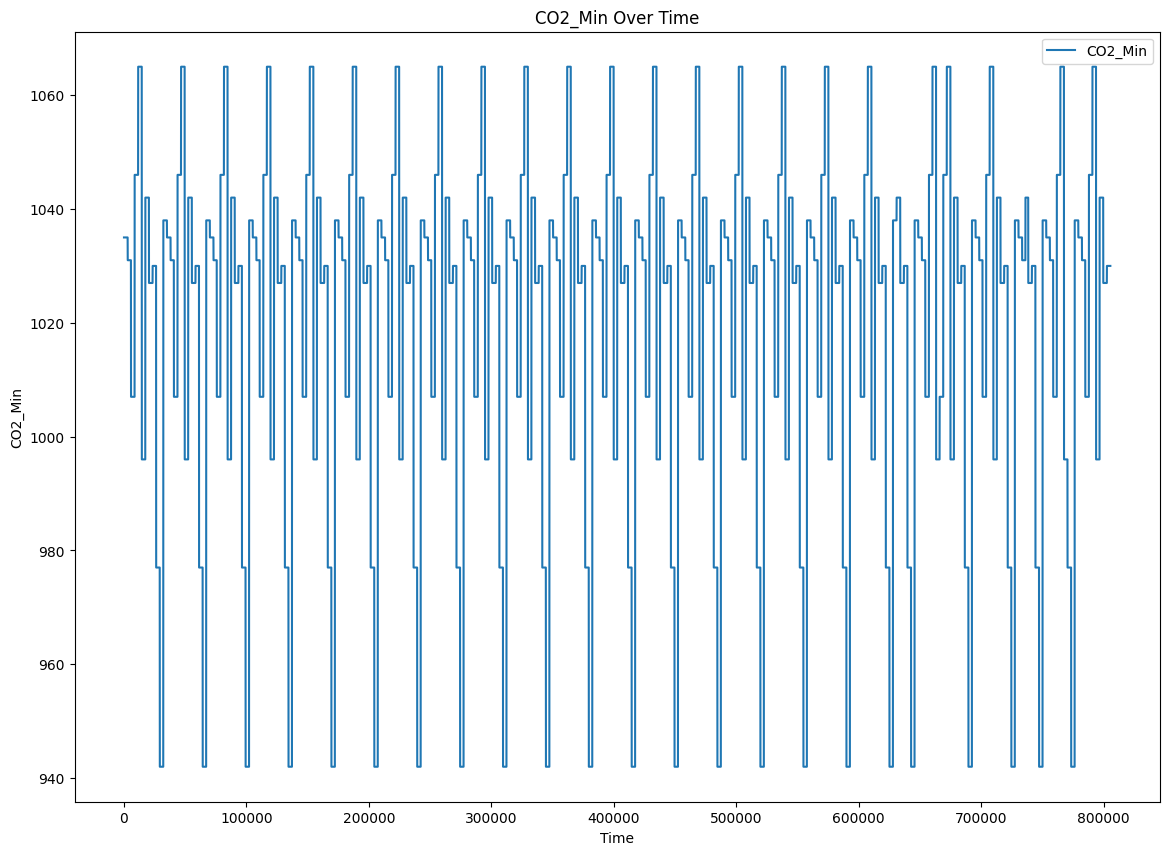

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(merged_df['CO2_Min'], label='CO2_Min')
plt.title("CO2_Min Over Time")
plt.xlabel("Time")
plt.ylabel("CO2_Min")
plt.legend()
plt.show()

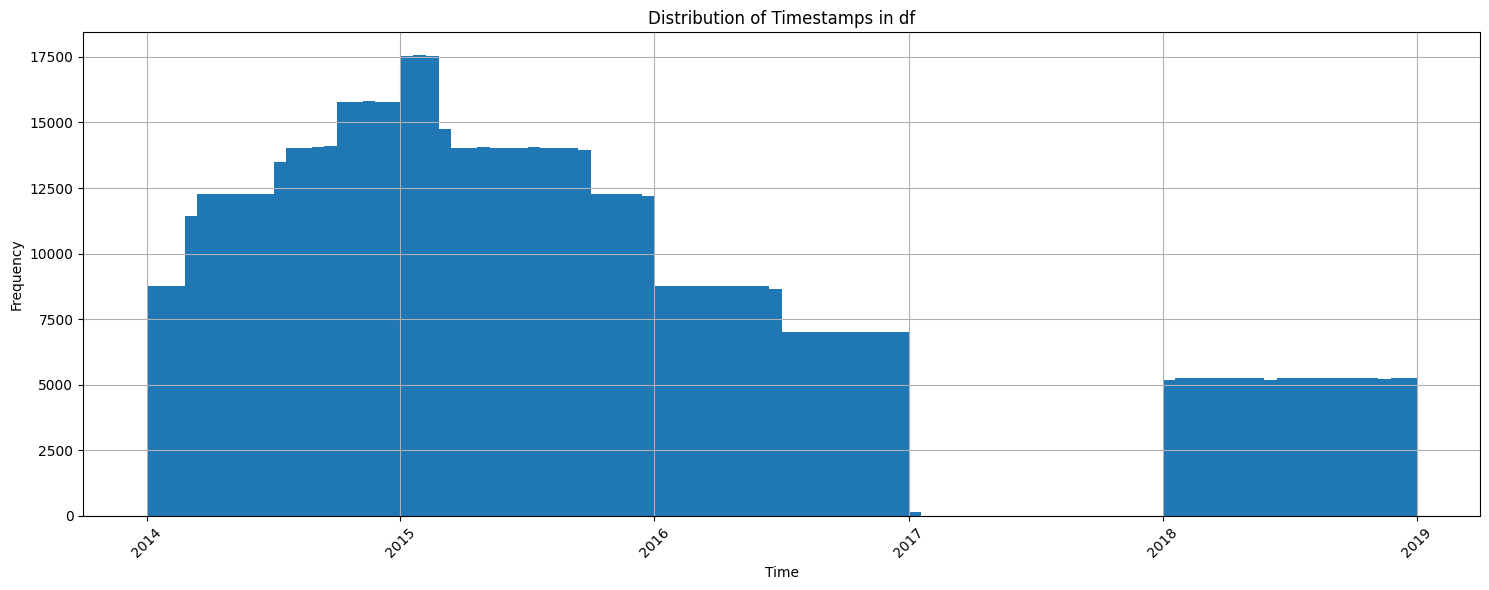

In [ ]:
plt.figure(figsize=(15, 6))
df['time'].hist(bins=100)  # Adjust bins for desired granularity
plt.title('Distribution of Timestamps in df')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()